In [1]:
from argparse import Namespace
from classifier import *

from dataset import *
from vectorizer import *

import torch


/home/nikos/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
def use_cuda():
    return torch.device("cpu" if torch.cuda.is_available() else "cpu")

args = Namespace (
    in_features=None,
    out_units=3,
    units_per_layer=[128, 64],
    dataset=None,
    optimizer="Adam",
    criterion="bce_ls",
    batch_size=128,
    learning_rate=0.001,
    num_epochs=10,
    device=use_cuda(),
    binary_class=False,
    embed_dim=300,
    freeze_embedding=False,
    filter_sizes=[3, 4, 5],
    num_filters=[100, 100, 100],
    pretrained_embedding=None,
    hidden_size=2, # number of features in hidden state
    num_layers=1 # number of stacked lstm layers
)

In [3]:
args.dataset = TextDataset.load_dataset_and_make_vectorizer("../data/Tweets.csv")
args.in_features = len(args.dataset.vectorizer.text_vocab)
args.out_features = len(args.dataset.vectorizer.label_vocab)

[nltk_data] Downloading package stopwords to /home/nikos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### BOW

In [4]:
bow = BOWClassifier(args=args)
bow.setup()
bow.fit()

100%|██████████| 10/10 [00:23<00:00,  2.32s/it]


In [5]:
loss, acc, f1 = bow.eval_net(mode='test')
print(loss)
print(acc)
print(f1)

0.6283972046592019
74.25426136363637
67.38384338955872


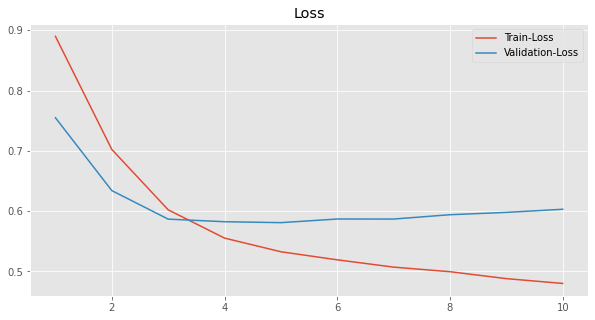

In [6]:
bow.plot_logs(title="Loss", legend=["Train-Loss", "Validation-Loss"])

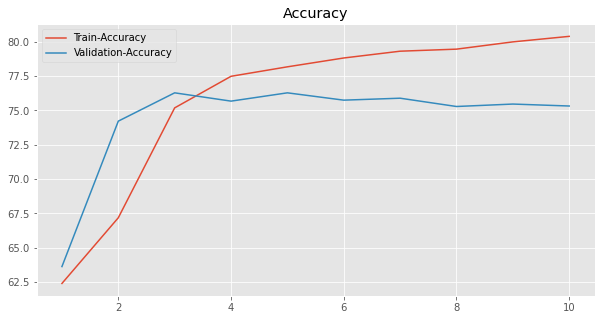

In [7]:
bow.plot_logs(title="Accuracy", legend=["Train-Accuracy", "Validation-Accuracy"])

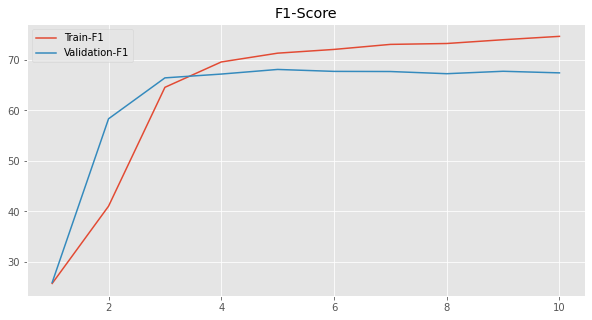

In [8]:
bow.plot_logs(title="F1-Score", legend=["Train-F1", "Validation-F1"])

In [30]:
args.dataset = TextDataset.load_dataset_and_make_vectorizer("../data/Tweets.csv", vectorizer_mode="padded")
args.in_features = len(args.dataset.vectorizer.text_vocab)
args.out_features = len(args.dataset.vectorizer.label_vocab)
args.pretrained_embedding = args.dataset.vectorizer.load_pretrained_embed("../data/crawl-300d-2M.vec")

[nltk_data] Downloading package stopwords to /home/nikos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
1999995it [00:33, 59064.58it/s]


### CNN

In [10]:
cnn_classifier = CNNClassifier(args=args)
cnn_classifier.setup()
cnn_classifier.fit()

100%|██████████| 10/10 [04:34<00:00, 27.45s/it]


In [11]:
loss, acc, f1 = cnn_classifier.eval_net(mode='test')
print(loss)
print(acc)
print(f1)

0.6866289295933464
74.92897727272727
67.48691015073688


### LSTM

In [31]:
lstm_classifier = LSTMClassifier(args, hidden_size, num_layers)
lstm_classifier.setup()
lstm_classifier.fit()

100%|██████████| 100/100 [15:59<00:00,  9.60s/it]


In [32]:
loss, acc, f1 = lstm_classifier.eval_net(mode='test')
print(loss)
print(acc)
print(f1)

1.1163009215484965
70.34801136363636
62.80253249289965
